In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("studentInfo.csv")
data.head(3)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [17]:
data.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [18]:
null_sum = data.isnull().sum()
print(f"Sum of null values in 'py' column: {null_sum}")

Sum of null values in 'py' column: code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64


In [19]:
# Handle missing values in imd_band with the mode (most frequent value)
data['imd_band'].fillna(data['imd_band'].mode()[0], inplace=True)

In [20]:
# Unique values in categorical columns
data['gender'].value_counts()
data['region'].value_counts()
data['highest_education'].value_counts()
data['imd_band'].value_counts()
data['age_band'].value_counts()
data['disability'].value_counts()
data['final_result'].value_counts()

Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64

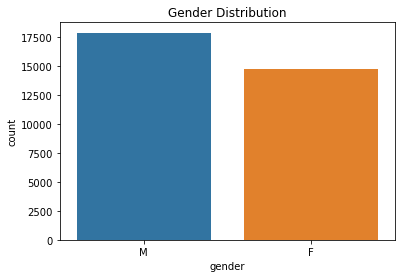

In [21]:
# Distribution of gender
sns.countplot(data=data, x='gender')
plt.title('Gender Distribution')
plt.show()

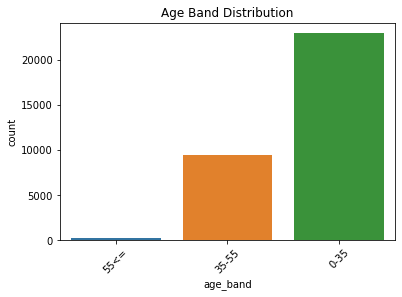

In [22]:
# Distribution of age_band
sns.countplot(data=data, x='age_band')
plt.title('Age Band Distribution')
plt.xticks(rotation=45)
plt.show()

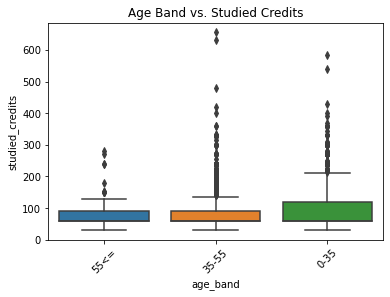

In [23]:
# Relationship between age_band and studied_credits
sns.boxplot(data=data, x='age_band', y='studied_credits')
plt.title('Age Band vs. Studied Credits')
plt.xticks(rotation=45)
plt.show()

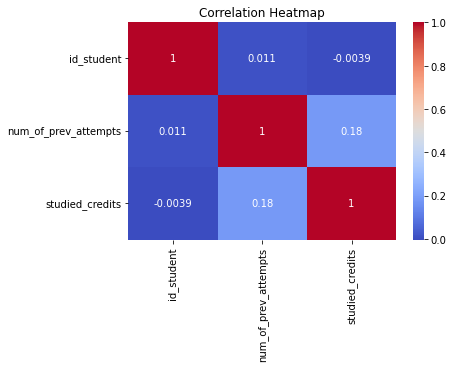

In [24]:
# Correlation heatmap for numerical columns
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()